# **Read the DataSet**

In [ ]:
import pandas as pd

# Load the uploaded DDoS CSV file
ddos_df = pd.read_csv("/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

# Basic info and first few rows
ddos_df.head()




,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
ddos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

#**Preprocessing**

In [ ]:
# Preprocessing
import numpy as np
ddos_df.columns = ddos_df.columns.str.strip()  # Remove leading/trailing spaces
ddos_df = ddos_df.loc[:, ddos_df.nunique() > 1]     # Remove constant columns
ddos_df.replace([np.inf, -np.inf], np.nan, inplace=True)
ddos_df.dropna(inplace=True)

/tmp/ipython-input-3-3519195321.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddos_df.replace([np.inf, -np.inf], np.nan, inplace=True)


# **EDA**

In [ ]:

# Check class distribution
class_distribution = ddos_df['Label'].value_counts()

# **Class Distribution**

In [ ]:
class_distribution

,count
Label,
DDoS,128025
BENIGN,97686


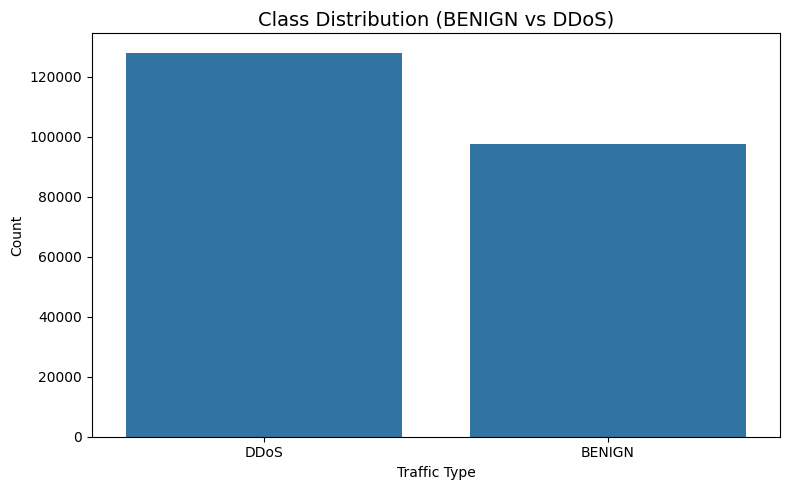

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


#  Remove columns with all identical values or high NaN
nunique = ddos_df.nunique()
constant_columns = nunique[nunique <= 1].index.tolist()
ddos_df_cleaned = ddos_df.drop(columns=constant_columns)

# Clean column names (remove leading/trailing spaces)
ddos_df_cleaned.columns = ddos_df_cleaned.columns.str.strip()

#  Check updated class distribution after cleanup
class_dist_clean = ddos_df_cleaned['Label'].value_counts()

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=ddos_df_cleaned, x='Label', order=class_dist_clean.index)
plt.title("Class Distribution (BENIGN vs DDoS)", fontsize=14)
plt.xlabel("Traffic Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


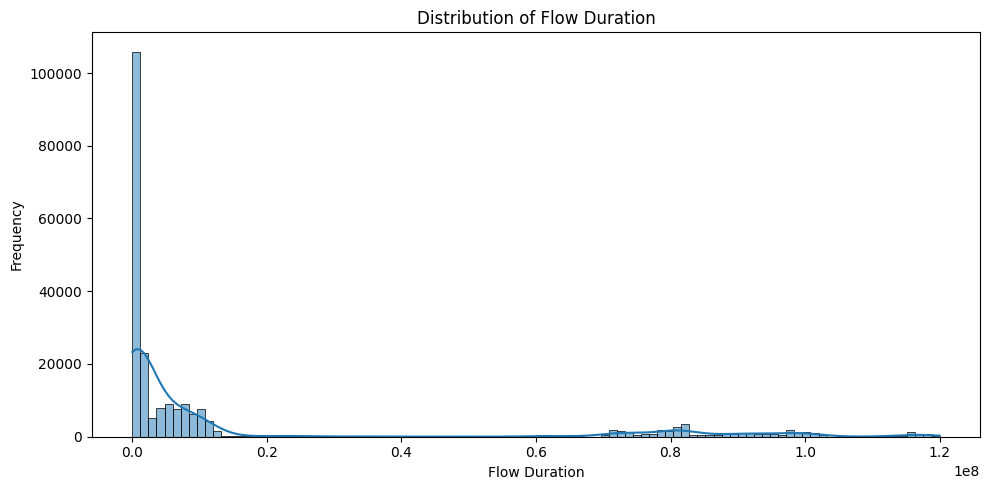

In [ ]:
#  Distribution of Flow Duration
plt.figure(figsize=(10, 5))
sns.histplot(data=ddos_df_cleaned, x='Flow Duration', bins=100, kde=True)
plt.title("Distribution of Flow Duration")
plt.xlabel("Flow Duration")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

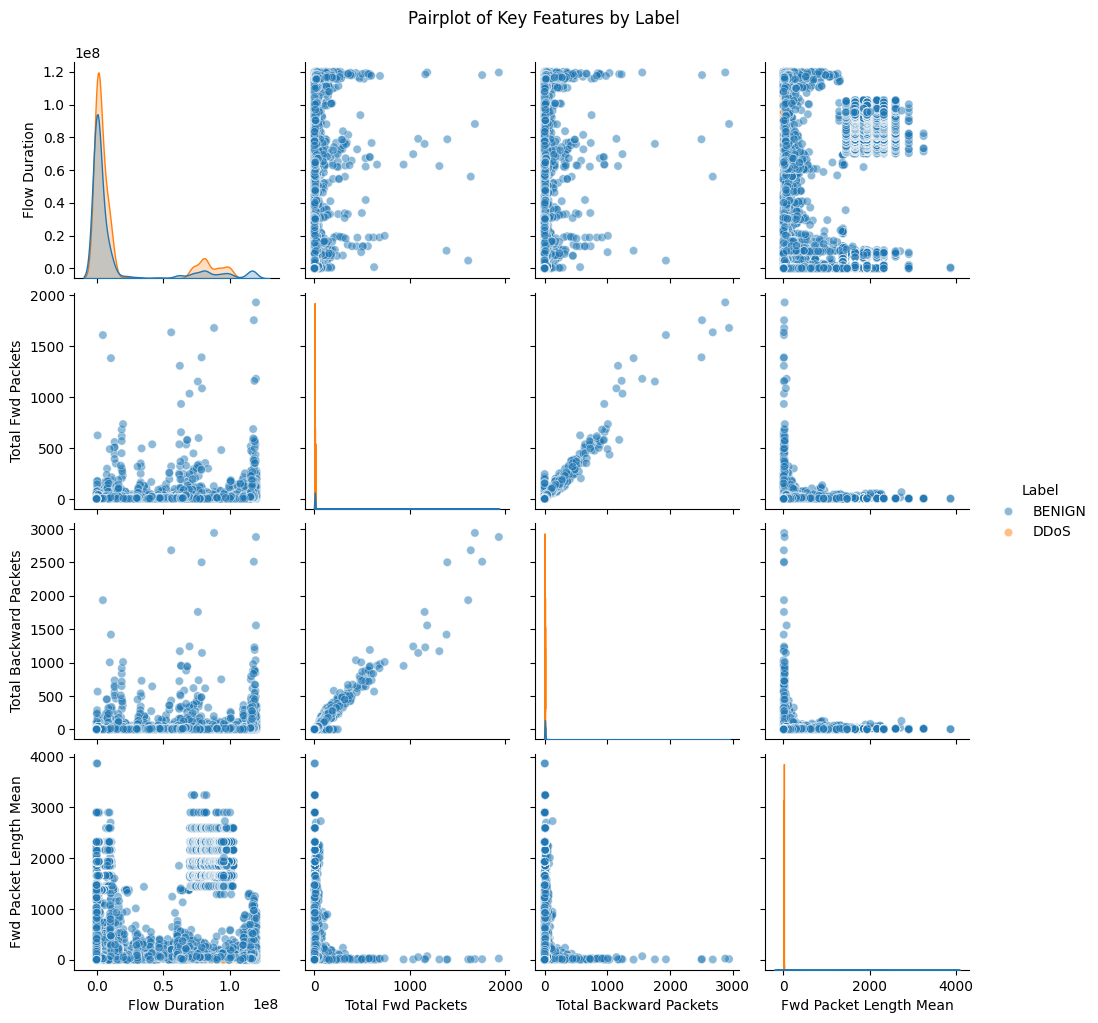

In [ ]:
# 2. Pairplot of selected features grouped by Label
selected_features = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packet Length Mean', 'Label']
pairplot_df = ddos_df_cleaned[selected_features].copy()
pairplot_df['Label'] = pairplot_df['Label'].astype('category')

sns.pairplot(pairplot_df, hue='Label', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Key Features by Label", y=1.02)
plt.show()

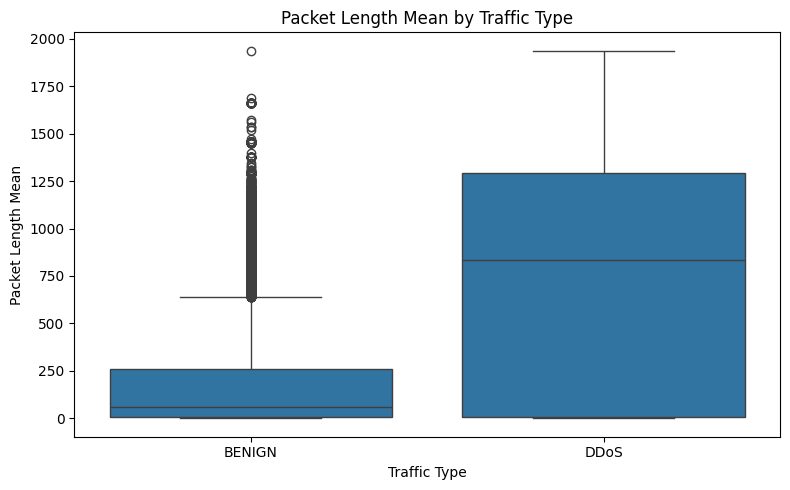

In [ ]:



#  Boxplot for Packet Length Mean by Label
plt.figure(figsize=(8, 5))
sns.boxplot(data=ddos_df_cleaned, x='Label', y='Packet Length Mean')
plt.title("Packet Length Mean by Traffic Type")
plt.xlabel("Traffic Type")
plt.ylabel("Packet Length Mean")
plt.tight_layout()
plt.show()


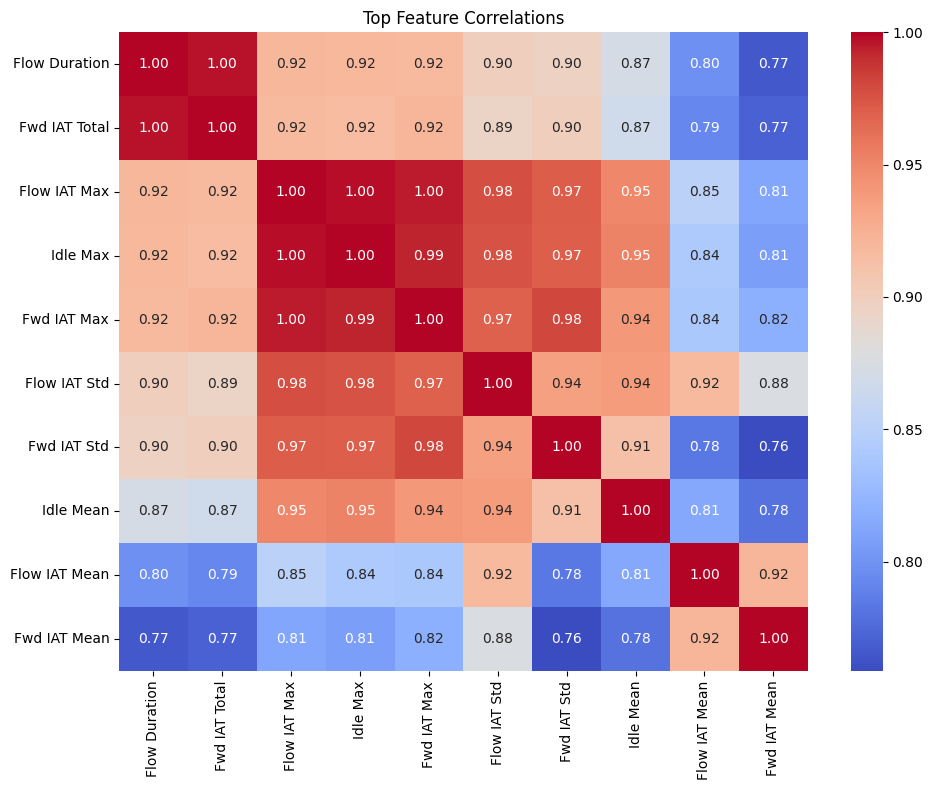

In [ ]:
#  Generate correlation heatmap (top correlated features only)
numeric_df = ddos_df_cleaned.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
top_corr = corr_matrix.abs().nlargest(10, 'Flow Duration')['Flow Duration'].index

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[top_corr, top_corr], annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Top Feature Correlations")
plt.tight_layout()
plt.show()

# **Model Building**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from scipy.stats import ttest_ind
import numpy as np


## **Label Encoding**

In [ ]:

#  Encode labels
ddos_df['Label']= ddos_df['Label'].map({'BENIGN': 0, 'DDoS': 1})

## **Remove(DROP) infinity value from the datase**t

In [ ]:
#  Separate features and target
X = ddos_df.drop(columns=['Label'])
y =ddos_df['Label']


In [ ]:
import numpy as np

# Replace inf/-inf with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaNs
X.dropna(inplace=True)
y = y[X.index]  # Align target with cleaned features

## **Feature Scale and Data Split into train and test**

In [ ]:

#  Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


# **Train the Machine Learning Model**

## **Model Define**

In [ ]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
}


## **Evalute the Model**

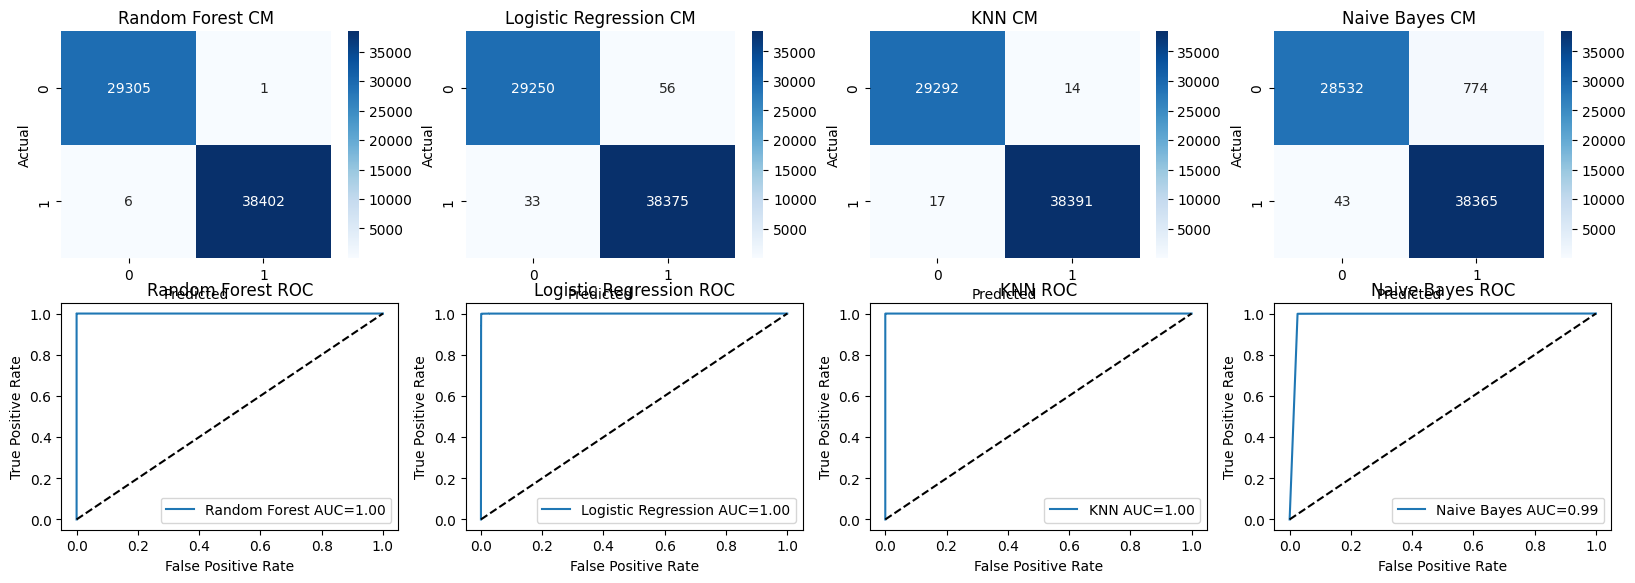

In [ ]:



results = []
plt.figure(figsize=(20, 10))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba) if y_proba is not None else (None, None, None)
    roc_auc = auc(fpr, tpr) if fpr is not None else None

    results.append({
        "model": name,
        "accuracy": report["accuracy"],
        "precision": report["weighted avg"]["precision"],
        "recall": report["weighted avg"]["recall"],
        "f1_score": report["weighted avg"]["f1-score"],
        "roc_auc": roc_auc
    })

    # Plot Confusion Matrix
    plt.subplot(3, len(models), i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} CM")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Plot ROC Curve
    if fpr is not None:
        plt.subplot(3, len(models), i + len(models))
        plt.plot(fpr, tpr, label=f"{name} AUC={roc_auc:.2f}")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{name} ROC")
        plt.legend()


In [ ]:
# Convert to DataFrame
results_df = pd.DataFrame(results)

results_df

,model,accuracy,precision,recall,f1_score,roc_auc
0,Random Forest,0.999897,0.999897,0.999897,0.999897,1.000000
1,Logistic Regression,0.998686,0.998686,0.998686,0.998686,0.999739
2,KNN,0.999542,0.999542,0.999542,0.999542,0.999931
3,Naive Bayes,0.987935,0.988132,0.987935,0.987915,0.986693


## **Cross Validation**

In [ ]:

# T-test to compare models' cross_val_score (accuracy)
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_scores[name] = scores

# Convert scores to DataFrame
cv_df = pd.DataFrame(cv_scores)


In [ ]:
cv_df

,Random Forest,Logistic Regression,KNN,Naive Bayes
0,0.999889,0.998051,0.999047,0.985269
1,0.999934,0.998316,0.999756,0.994772
2,0.999889,0.999313,0.999601,0.997851
3,0.999978,0.999025,0.999690,0.988680
4,0.999247,0.996987,0.996013,0.974813


In [ ]:
# Create a summary DataFrame for CV results
cv_summary = pd.DataFrame({
    'Model': cv_df.columns,
    'CV Mean Accuracy': cv_df.mean().values,
    'CV Std Deviation': cv_df.std().values
})

# Display the summary
cv_summary

,Model,CV Mean Accuracy,CV Std Deviation
0,Random Forest,0.999787,0.000304
1,Logistic Regression,0.998339,0.000913
2,KNN,0.998822,0.001595
3,Naive Bayes,0.988277,0.009005


# **DEEP Learning Model**

# **Model Define LSTM, GRU, CNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, MaxPooling1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Reshape input for deep learning models
X_train_dl = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_dl = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define LSTM model
lstm_model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# lstm_model.fit(X_train_dl, y_train, epochs=5, batch_size=64, verbose=1)

# Define GRU model
gru_model = Sequential([
    GRU(64, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
gru_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# gru_model.fit(X_train_dl, y_train, epochs=5, batch_size=64, verbose=1)

# Define CNN model
cnn_model = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

## **Train The MOdel**

In [ ]:

cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# cnn_model.fit(X_train_dl, y_train, epochs=5, batch_size=64, verbose=1)

# Train LSTM and save history
lstm_history = lstm_model.fit(X_train_dl, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(X_test_dl, y_test))

# Train GRU and save history
gru_history = gru_model.fit(X_train_dl, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(X_test_dl, y_test))

# Train CNN and save history
cnn_history = cnn_model.fit(X_train_dl, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(X_test_dl, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2469/2469 ━━━━━━━━━━━━━━━━━━━━ 101s 40ms/step - accuracy: 0.9367 - loss: 0.1456 - val_accuracy: 0.9876 - val_loss: 0.0372
Epoch 2/5
2469/2469 ━━━━━━━━━━━━━━━━━━━━ 144s 41ms/step - accuracy: 0.9934 - loss: 0.0231 - val_accuracy: 0.9931 - val_loss: 0.0176
Epoch 3/5
2469/2469 ━━━━━━━━━━━━━━━━━━━━ 137s 39ms/step - accuracy: 0.9948 - loss: 0.0194 - val_accuracy: 0.9981 - val_loss: 0.0090
Epoch 4/5
2469/2469 ━━━━━━━━━━━━━━━━━━━━ 96s 39ms/step - accuracy: 0.9940 - loss: 0.0220 - val_accuracy: 0.9968 - val_loss: 0.0140
Epoch 5/5
2469/2469 ━━━━━━━━━━━━━━━━━━━━ 135s 36ms/step - accuracy: 0.9969 - loss: 0.0117 - val_accuracy: 0.9935 - val_loss: 0.0245
Epoch 1/5
2469/2469 ━━━━━━━━━━━━━━━━━━━━ 123s 49ms/step - accuracy: 0.9066 - loss: 0.2086 - val_accuracy: 0.9909 - val_loss: 0.0276
Epoch 2/5
2469/2469 ━━━━━━━━━━━━━━━━━━━━ 120s 49ms/step - accuracy: 0.9942 - loss: 0.0202 - val_accuracy: 0.9973 - val_loss: 0.0108
Epoch 3/5
2469/2469 ━━━━━━━━━━━━━━━━━━━━ 131s 53ms/step - accuracy: 0.9967 - 

## **History plots**

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name="Model"):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_training_history(history, model_name="CNN")


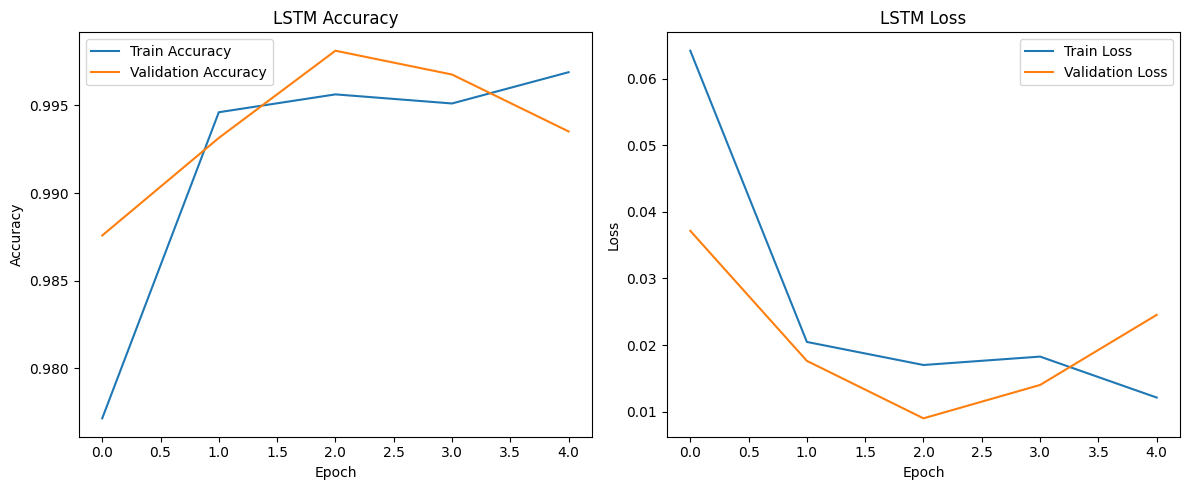

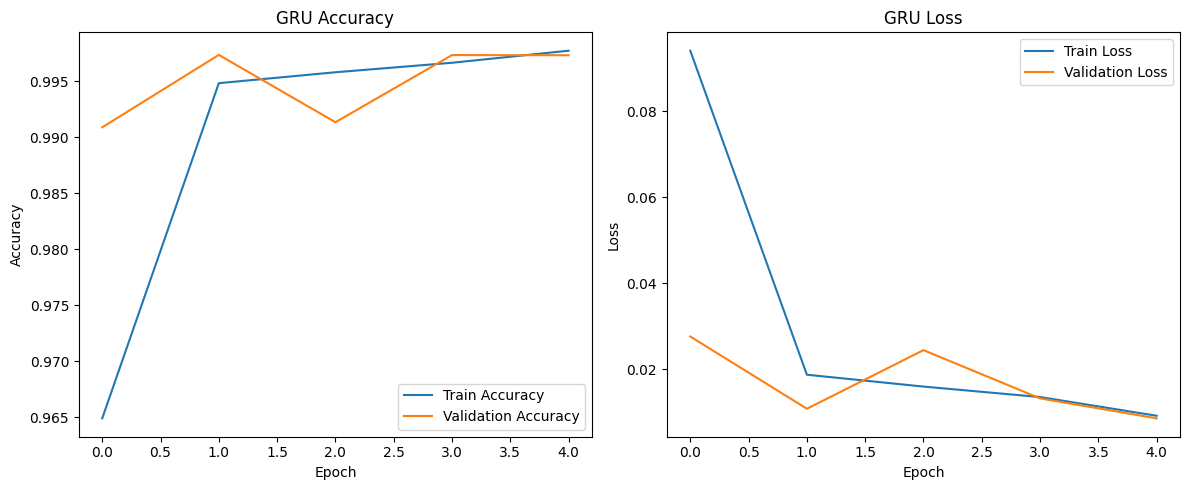

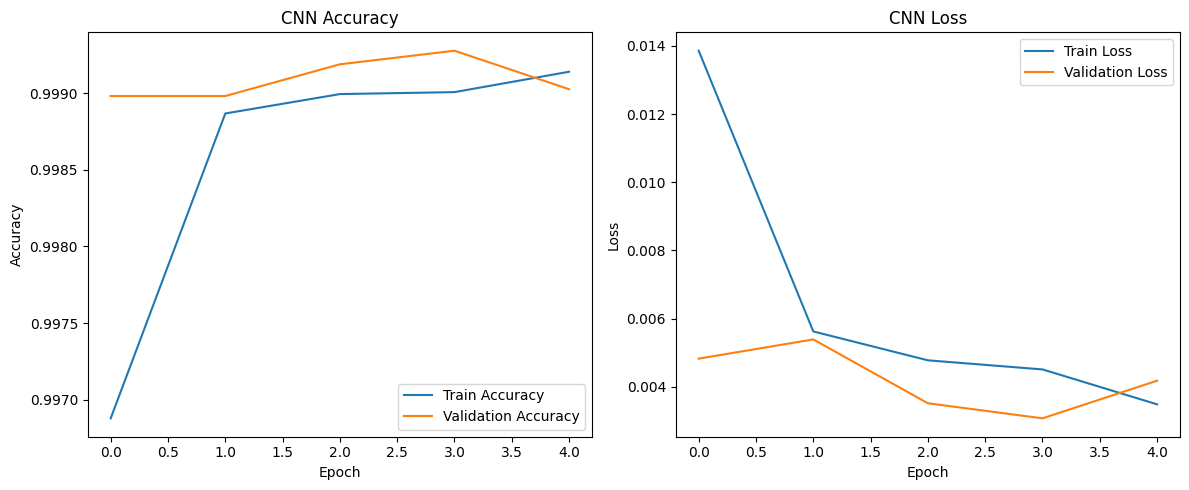

In [ ]:
plot_training_history(lstm_history, model_name="LSTM")
plot_training_history(gru_history, model_name="GRU")
plot_training_history(cnn_history, model_name="CNN")


## **Model Evaluation**

2117/2117 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     29306
           1       0.99      0.99      0.99     38408

    accuracy                           0.99     67714
   macro avg       0.99      0.99      0.99     67714
weighted avg       0.99      0.99      0.99     67714

GRU Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29306
           1       1.00      1.00      1.00     38408

    accuracy                           1.00     67714
   macro avg       1.00      1.00      1.00     67714
weighted avg       1.00      1.00      1.00     67714

CNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29306
           1       1.

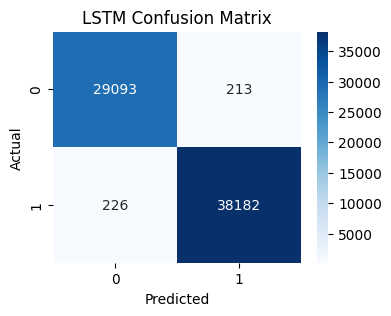

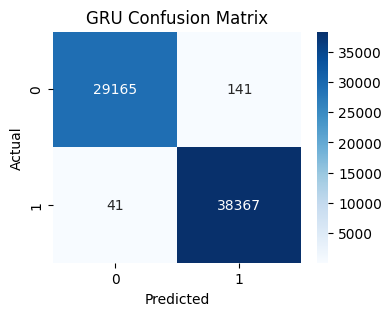

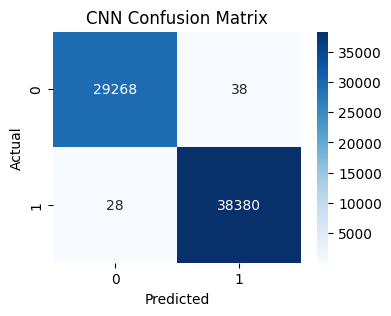

2117/2117 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step
2117/2117 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


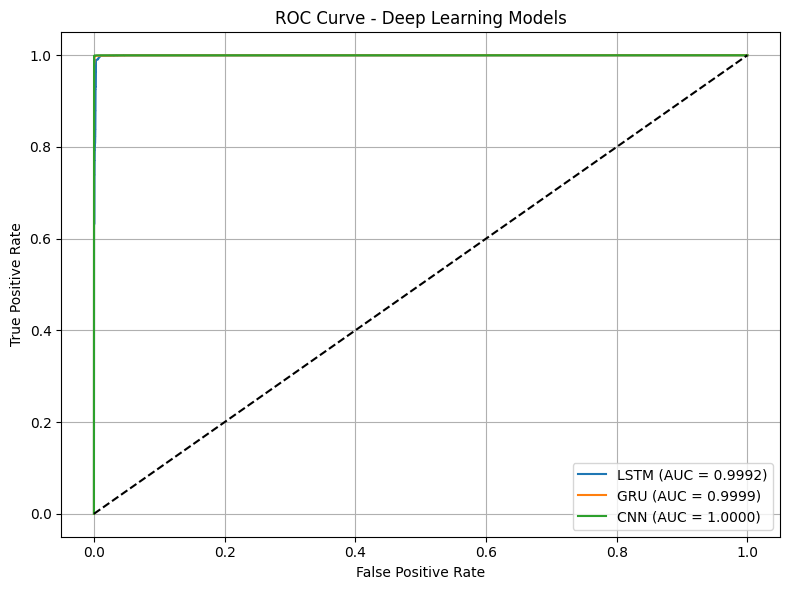

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Predictions
lstm_preds = (lstm_model.predict(X_test_dl) > 0.5).astype("int32")
gru_preds = (gru_model.predict(X_test_dl) > 0.5).astype("int32")
cnn_preds = (cnn_model.predict(X_test_dl) > 0.5).astype("int32")

# Classification Reports
print("LSTM Classification Report:\n", classification_report(y_test, lstm_preds))
print("GRU Classification Report:\n", classification_report(y_test, gru_preds))
print("CNN Classification Report:\n", classification_report(y_test, cnn_preds))

# Confusion Matrices
models_preds = {'LSTM': lstm_preds, 'GRU': gru_preds, 'CNN': cnn_preds}
for name, preds in models_preds.items():
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ROC Curves
plt.figure(figsize=(8, 6))
for name, model in zip(['LSTM', 'GRU', 'CNN'], [lstm_model, gru_model, cnn_model]):
    y_pred_proba = model.predict(X_test_dl).ravel()
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Deep Learning Models')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



## **Cross validation**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Convert X and y to numpy arrays for StratifiedKFold
X_np = X.values
y_np = y.values

# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Using 5 splits

cnn_accuracies = []

for train_idx, val_idx in kfold.split(X_np, y_np):
    X_train_cv, X_val_cv = X_np[train_idx], X_np[val_idx]
    y_train_cv, y_val_cv = y_np[train_idx], y_np[val_idx]

    # Reshape data for CNN
    X_train_cv = X_train_cv.reshape((X_train_cv.shape[0], X_train_cv.shape[1], 1))
    X_val_cv = X_val_cv.reshape((X_val_cv.shape[0], X_val_cv.shape[1], 1))


    # Define CNN model
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cv.shape[1], X_train_cv.shape[2])))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train
    model.fit(X_train_cv, y_train_cv, epochs=5, batch_size=128, verbose=0)

    # Predict and evaluate
    y_pred_cv = (model.predict(X_val_cv) > 0.5).astype("int32")
    acc = accuracy_score(y_val_cv, y_pred_cv)
    cnn_accuracies.append(acc)
    print(f"CNN Fold Accuracy: {acc:.4f}")

print(f"\nAverage CNN CV Accuracy: {np.mean(cnn_accuracies):.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
CNN Fold Accuracy: 0.9123


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
CNN Fold Accuracy: 0.4620


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
CNN Fold Accuracy: 0.8741


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
CNN Fold Accuracy: 0.8829


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
CNN Fold Accuracy: 0.9054

Average CNN CV Accuracy: 0.8073


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Convert X and y to numpy arrays for StratifiedKFold
X_np = X.values
y_np = y.values

# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Using 5 splits


lstm_accuracies = []

for train_idx, val_idx in kfold.split(X_np, y_np):
    X_train_cv, X_val_cv = X_np[train_idx], X_np[val_idx]
    y_train_cv, y_val_cv = y_np[train_idx], y_np[val_idx]

    # Reshape data for LSTM
    X_train_cv = X_train_cv.reshape((X_train_cv.shape[0], X_train_cv.shape[1], 1))
    X_val_cv = X_val_cv.reshape((X_val_cv.shape[0], X_val_cv.shape[1], 1))

    # LSTM model
    model = Sequential()
    model.add(LSTM(64, return_sequences=False, input_shape=(X_train_cv.shape[1], X_train_cv.shape[2])))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train_cv, y_train_cv, epochs=5, batch_size=128, verbose=0)

    y_pred_cv = (model.predict(X_val_cv) > 0.5).astype("int32")
    acc = accuracy_score(y_val_cv, y_pred_cv)
    lstm_accuracies.append(acc)
    print(f"LSTM Fold Accuracy: {acc:.4f}")

print(f"\nAverage LSTM CV Accuracy: {np.mean(lstm_accuracies):.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step
LSTM Fold Accuracy: 0.9991


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step
LSTM Fold Accuracy: 0.9996


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step
LSTM Fold Accuracy: 0.9990


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step
LSTM Fold Accuracy: 0.9990


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step
LSTM Fold Accuracy: 0.9994

Average LSTM CV Accuracy: 0.9992


In [ ]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold


gru_accuracies = []

# Convert X and y to numpy arrays for StratifiedKFold
X_np = X.values
y_np = y.values

# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Using 5 splits


for train_idx, val_idx in kfold.split(X_np, y_np):
    X_train_cv, X_val_cv = X_np[train_idx], X_np[val_idx]
    y_train_cv, y_val_cv = y_np[train_idx], y_np[val_idx]

    # Reshape data for GRU
    X_train_cv = X_train_cv.reshape((X_train_cv.shape[0], X_train_cv.shape[1], 1))
    X_val_cv = X_val_cv.reshape((X_val_cv.shape[0], X_val_cv.shape[1], 1))

    # GRU model
    model = Sequential()
    model.add(GRU(64, return_sequences=False, input_shape=(X_train_cv.shape[1], X_train_cv.shape[2])))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train_cv, y_train_cv, epochs=5, batch_size=128, verbose=0)

    y_pred_cv = (model.predict(X_val_cv) > 0.5).astype("int32")
    acc = accuracy_score(y_val_cv, y_pred_cv)
    gru_accuracies.append(acc)
    print(f"GRU Fold Accuracy: {acc:.4f}")

print(f"\nAverage GRU CV Accuracy: {np.mean(gru_accuracies):.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step
GRU Fold Accuracy: 0.9991


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step
GRU Fold Accuracy: 0.9994


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step
GRU Fold Accuracy: 0.9996


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step
GRU Fold Accuracy: 0.9995


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1411/1411 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step
GRU Fold Accuracy: 0.9995

Average GRU CV Accuracy: 0.9994
